In [157]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [158]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [159]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [161]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv("Train.csv")
df.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


Преобразовываем нечисловые поля и удаляем колонку "ID" 

In [164]:
conditions = [df["Warehouse_block"] == "A", 
              df["Warehouse_block"] == "B", 
              df["Warehouse_block"] == 'C', 
              df["Warehouse_block"] == 'D',
              df["Warehouse_block"] == "E",
              df["Warehouse_block"] == 'F']

choices = [0, 1, 2, 3, 4, 5] 
df["Warehouse_block"] = np.select(conditions, choices, default = df["Warehouse_block"])

df["Mode_of_Shipment"] = np.select([df["Mode_of_Shipment"] == "Flight", 
                                    df["Mode_of_Shipment"] == "Ship", 
                                    df["Mode_of_Shipment"] == "Road"], 
                                  [0, 1, 2], df["Mode_of_Shipment"])
df["Gender"] = np.select([df["Gender"] == 'F', 
                          df["Gender"] == 'M'],
                         [0, 1], df["Gender"])
df["Product_importance"] = np.select([df["Product_importance"] == 'low', 
                                      df["Product_importance"] == 'medium', 
                                      df["Product_importance"] == "high"],
                                     [0, 1, 2], df["Product_importance"])
df = df.drop(columns="ID", errors='ignore')

Произвожу центрирование и нормирование данных\. 
Столбцы. 
1. Warehouse_block
2.  Mode_of_Shipment
3.   Gender
4.    Reached.on.Time_Y.N
я решил не центрировать,т\.к\. в них содержатся данные, не являющиеся важными при центрировании\. Первые три - это колонки в которых содержались не числовые значения\. 
Последняя тоже не является числовой, скорее булевой, т\.к\. отражает вовремя ли был доставлен товар\.

In [166]:
median = df.median()
median["Warehouse_block"] = 0
median["Mode_of_Shipment"] = 0
median["Gender"] = 0
median["Reached.on.Time_Y.N"] = 0
df-=median
df/=df.max()

Делаем матрицу корреляций при помощи метода cor()

In [167]:
corrilation_mtx = df.corr()
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0.6,0.0,0.0,-0.5,-0.385417,0.0,-1.0,0.0,0.637931,-0.788748,1.0
1,1.0,0.0,0.0,1.0,0.020833,-0.142857,-1.0,1.0,0.896552,-0.286989,1.0
2,0.0,0.0,-0.666667,-0.5,-0.322917,0.142857,-1.0,1.0,0.706897,-0.209629,1.0
3,0.2,0.0,-0.333333,0.0,-0.395833,0.142857,0.0,1.0,0.051724,-0.803895,1.0
4,0.4,0.0,-0.666667,-0.5,-0.3125,0.0,0.0,0.0,0.672414,-0.450365,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10994,0.0,0.5,0.0,-1.0,0.395833,0.285714,0.0,0.0,-0.103448,-0.706248,1.0
10995,0.2,0.5,0.0,-1.0,0.1875,0.285714,0.0,0.0,-0.017241,-0.784961,0.0
10996,0.4,0.5,0.333333,0.5,0.291667,0.285714,-1.0,0.0,-0.051724,-0.809846,0.0
10997,1.0,0.5,0.333333,-0.5,0.09375,0.428571,0.0,1.0,-0.086207,-0.794969,0.0


Находим собственные значения матрицы кориляции. Сортируем массив с собственными значениями. Удаляем из исходной матрицы столбцы, которые имеют 

In [168]:
eigen_values = np.linalg.eigvals(corrilation_mtx) 
df_edded = df#копируем  дата фрейм
for i in range(4):
    eigen_values_sorted = sorted(eigen_values)
    min_index = np.where(eigen_values == eigen_values_sorted[i] )
    column_2_delete = df.columns[min_index]#выбираем элемент с самым маленьким собственным значением.
    df_edded = df_edded.drop(columns = column_2_delete, errors = "ignore")
df_edded

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0.6,0.0,-1.0,0.0,0.637931,-0.788748,1.0
1,1.0,0.0,-1.0,1.0,0.896552,-0.286989,1.0
2,0.0,0.0,-1.0,1.0,0.706897,-0.209629,1.0
3,0.2,0.0,0.0,1.0,0.051724,-0.803895,1.0
4,0.4,0.0,0.0,0.0,0.672414,-0.450365,1.0
...,...,...,...,...,...,...,...
10994,0.0,0.5,0.0,0.0,-0.103448,-0.706248,1.0
10995,0.2,0.5,0.0,0.0,-0.017241,-0.784961,0.0
10996,0.4,0.5,-1.0,0.0,-0.051724,-0.809846,0.0
10997,1.0,0.5,0.0,1.0,-0.086207,-0.794969,0.0


Выведим таблички с кореляцией исходных данных и обработанных\.

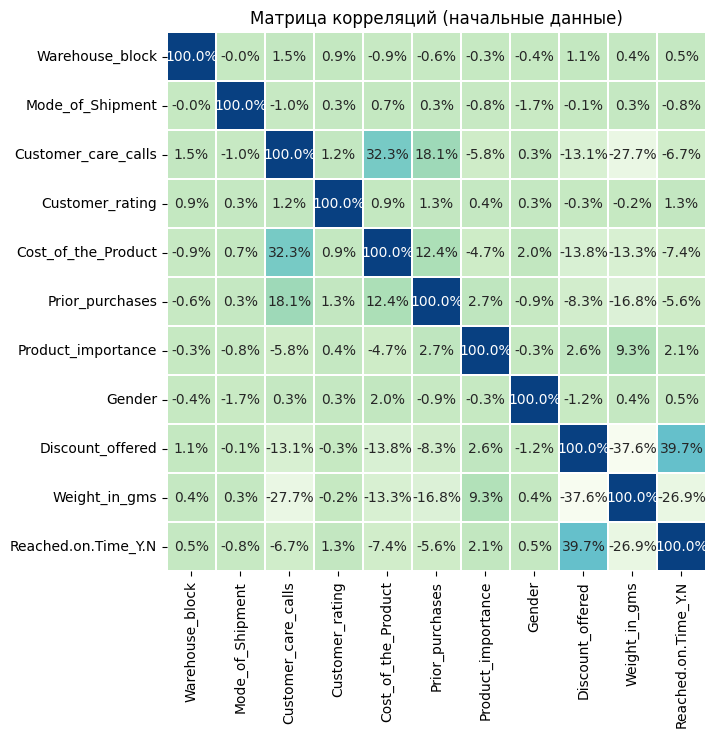

In [183]:
#изначальный набор данных
figsize = (7,7)
fontsize_annotation = 10 # размер шрифта в таблице
fig, ax = plt.subplots(figsize=figsize)
plt.title('Матрица корреляций (начальные данные)')
heatmap_df = sns.heatmap(df.corr(), #
                   annot=True, # вставляем значения из таблицы df.corr() 
                   square=True, # клетки внутри таблицы кваратные
                   fmt='.1%', #формат вывода данных
                   cmap='GnBu', #цветовая палитра
                   cbar=False, # убераем шкалу цветов
                   annot_kws={'size':str(fontsize_annotation)}, # изменяем размер текста 
                   linewidth=0.02 # ширина границы ячейки
                  )
plt.savefig('Correlation_matrix_df.png',dpi=300) # сохраняем таблицу
plt.show()

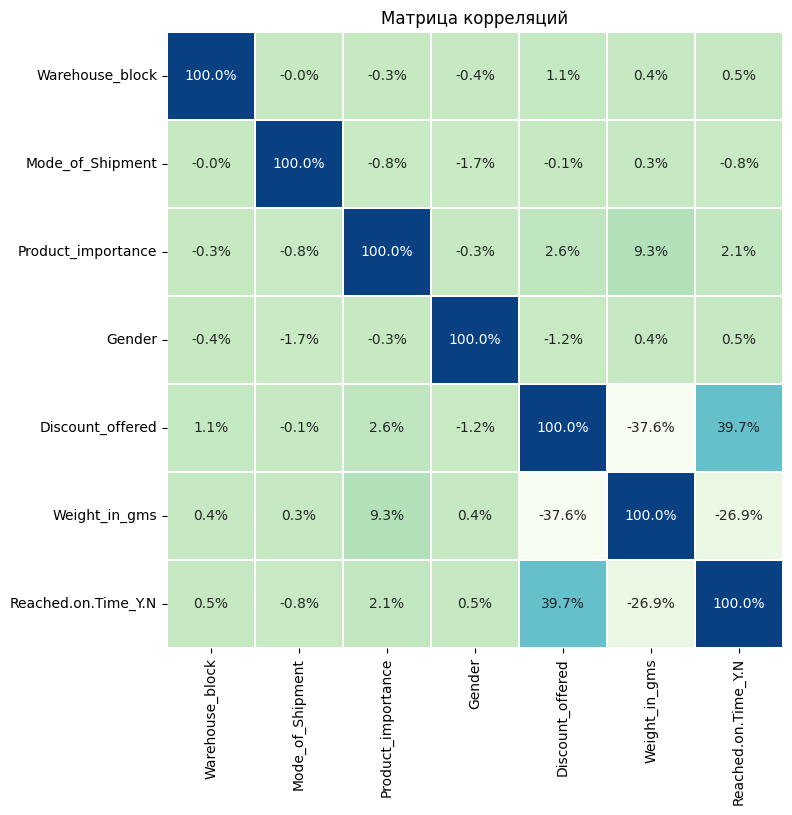

In [184]:
#отредактированный набор даных
figsize = (8,8)
fontsize_annotation = 10
fig, ax = plt.subplots(figsize=figsize)
plt.title('Матрица корреляций')
heat_map_df_edded = sns.heatmap(df_edded.corr(), 
                   annot=True, 
                   square=True, 
                   fmt='.1%', 
                   cmap='GnBu', 
                   cbar=False, 
                   annot_kws={'size':str(fontsize_annotation)}, 
                   linewidth=0.1 
                  )
plt.savefig('Correlation_matrix_df_edded.png',dpi=300)
plt.show()